In [1]:
import os
import matplotlib.pyplot as plt
import torch
os.chdir("..")
from src.cpwc.tools.ptychography import Ptychography as Ptychography
from src.cpwc.multires.class_multiressolver import *
from src.cpwc.multires.class_multires import *
from src.cpwc.tools.utils import *
torch.cuda.empty_cache()

# Set seeds 
torch.manual_seed(0)
np.random.seed(0)


/home/efe/Desktop/Multiresolution-Framework-for-Fourier-Ptychography/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def unwrap_2d(phase):
    """
    Unwraps a 2D phase array using NumPy's 1D unwrap function.
    
    Parameters:
    phase (numpy array): The 2D phase array to be unwrapped.
    
    Returns:
    unwrapped_phase (numpy array): The 2D unwrapped phase array.
    """
    # Unwrap along the first axis (rows)
    unwrapped_phase = np.unwrap(phase, axis=0)
    
    # Unwrap along the second axis (columns)
    unwrapped_phase = np.unwrap(unwrapped_phase, axis=1)
    
    return unwrapped_phase

In [3]:
max_scale = 9
max_probe_size = 128
max_shift = 32
device = 'cuda'
I_in = 15*np.array([1, 15, 10, 5, 10, 30, 100])
I_out = 20*np.array([0, 0, 0, 30, 30,40,80])
cycle = [0, -1, -1, -1,  1, 1, 1]
lmbda = 0
LR = 1e-1
tol = [1e-10] * 9
tol_in = [1e-10] * 9

linOperator = Ptychography(max_scale = max_scale,max_probe_size = max_probe_size ,max_shift = max_shift,device=device)
linOperator_u = Ptychography(max_scale = max_scale,max_probe_size = max_probe_size ,max_shift = max_shift,device=device)

image = plt.imread('test_data/peppers.jpg')/ 255 
image_tensor = torch.tensor(image).double().view(1, 1, 2**max_scale, 2**max_scale).to(torch.complex128)
x = torch.exp(1j * image_tensor).to(device)


In [4]:
c = x[:,:,::8,::8]
m = torch.ones(2, 2).to(device)
c_u = torch.kron(c, m)
c_u = torch.kron(c_u, m)


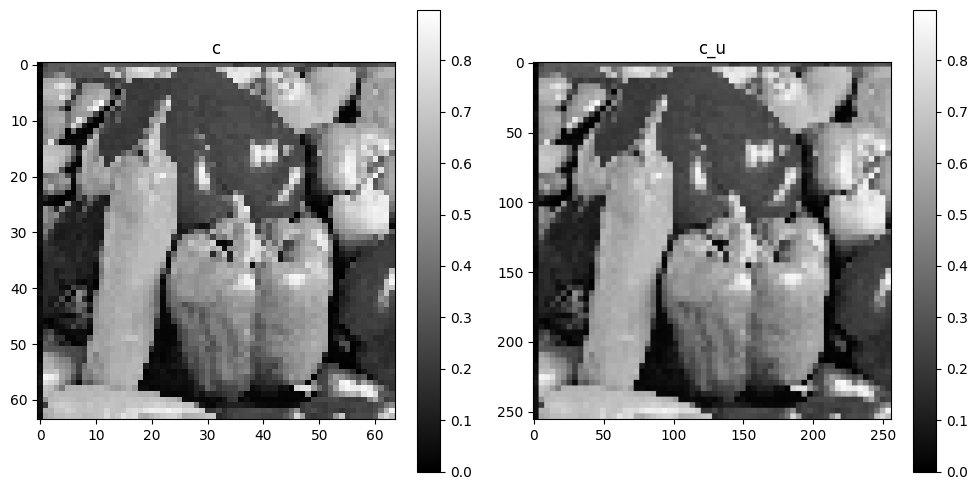

In [5]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(np.angle(c[0, 0].cpu().numpy()), cmap='gray')
plt.title('c')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(np.angle(c_u[0, 0].cpu().numpy()), cmap='gray')
plt.title('c_u')
plt.colorbar()
plt.tight_layout()
plt.show()


In [6]:
y = linOperator.apply_linop(c)
y_u = linOperator_u.apply_linop(c_u)

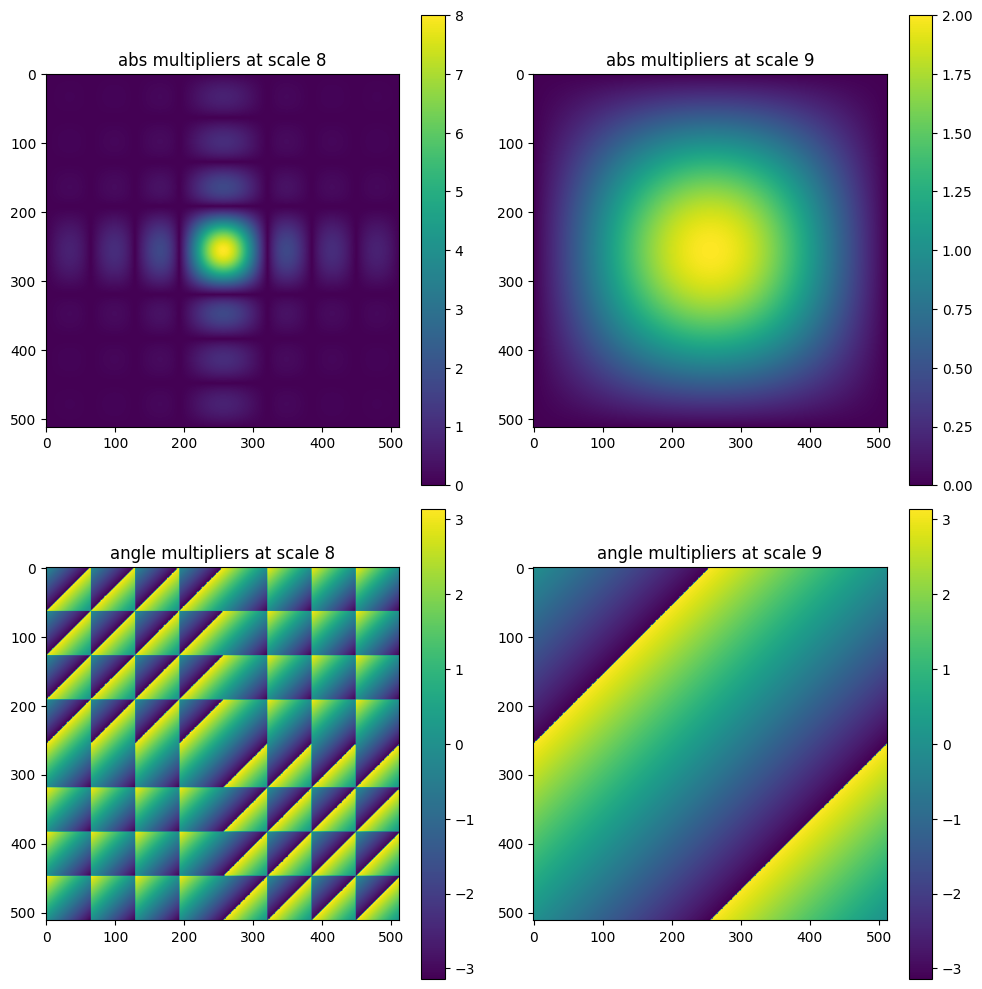

In [7]:
multip7 = linOperator.multipliers.cpu().numpy()
multip8 = linOperator_u.multipliers.cpu().numpy()
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(np.abs(linOperator.multipliers.cpu().numpy()))
plt.title('abs multipliers at scale 8')
plt.colorbar()
plt.subplot(2, 2, 2)
plt.imshow(np.abs(linOperator_u.multipliers.cpu().numpy()))
plt.title('abs multipliers at scale 9')
plt.colorbar()
plt.subplot(2, 2, 3)
plt.imshow(np.angle(linOperator.multipliers.cpu().numpy()))
plt.title('angle multipliers at scale 8')
plt.colorbar()
plt.subplot(2, 2, 4)
plt.imshow(np.angle(linOperator_u.multipliers.cpu().numpy()))
plt.title('angle multipliers at scale 9')
plt.colorbar()
plt.tight_layout()
plt.show()


In [8]:
multip7[0,0]

(6.1949732e-15+4.332654e-21j)

/tmp/ipykernel_1291704/3710562237.py:7: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(y_u[0, 0].cpu().numpy())), cmap='gray')


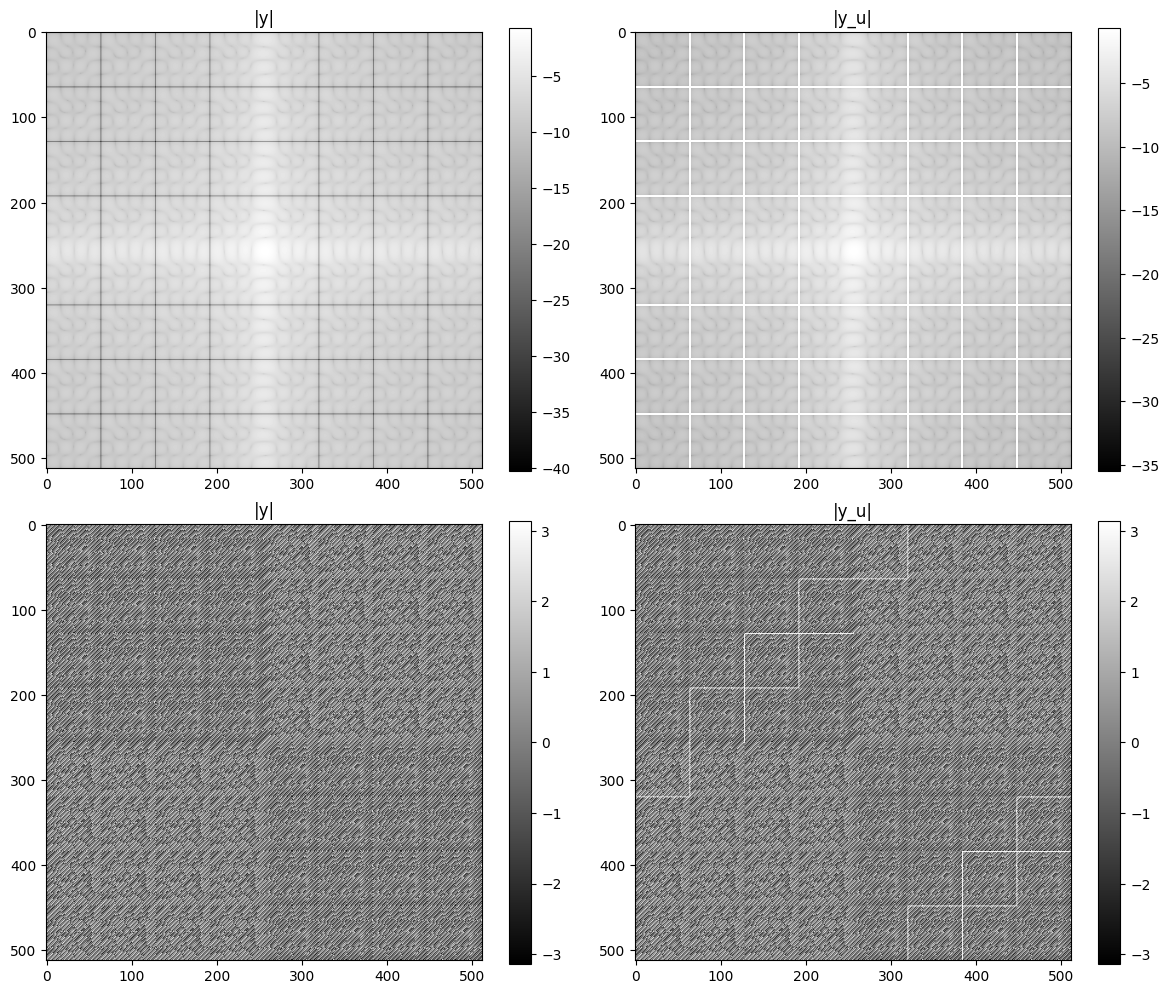

In [9]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.imshow(np.log(np.abs(y[0, 0].cpu().numpy())), cmap='gray')
plt.title('|y|')
plt.colorbar()
plt.subplot(2, 2, 2)
plt.imshow(np.log(np.abs(y_u[0, 0].cpu().numpy())), cmap='gray')
plt.title('|y_u|')
plt.colorbar()
plt.subplot(2, 2, 3)
plt.imshow(np.angle(y[0, 0].cpu().numpy()), cmap='gray')
plt.title('|y|')
plt.colorbar()
plt.subplot(2, 2, 4)
plt.imshow(np.angle(y_u[0, 0].cpu().numpy()), cmap='gray')
plt.title('|y_u|')
plt.colorbar()
plt.tight_layout()
plt.show()


In [10]:
k1 = 8
k2 = 110

print(y[0,0,k1,k2])
print(y_u[0,0,k1,k2])


tensor(0.0001+8.5978e-05j, device='cuda:0', dtype=torch.complex128)
tensor(0.0001+8.5978e-05j, device='cuda:0', dtype=torch.complex128)


/tmp/ipykernel_1291704/111897711.py:9: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs_diff), cmap='gray')
/tmp/ipykernel_1291704/111897711.py:9: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(abs_diff), cmap='gray')


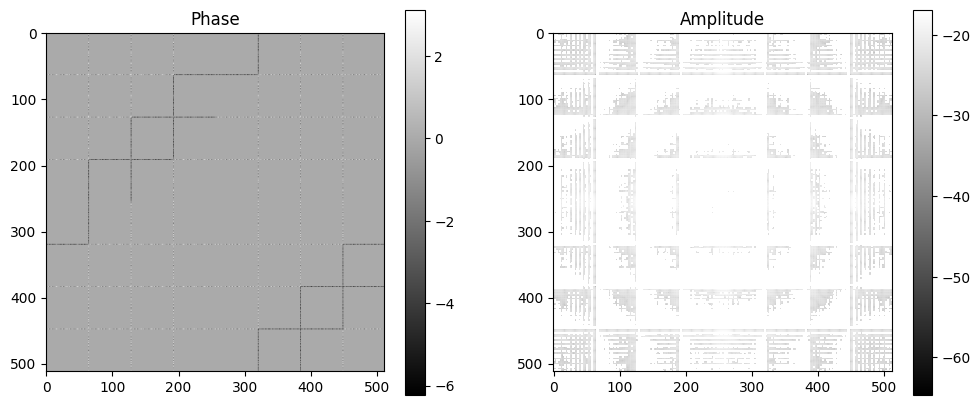

In [11]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
angle_diff = np.angle(y[0,0].cpu().numpy())-np.angle(y_u[0,0].cpu().numpy())
plt.imshow(angle_diff, cmap='gray')
plt.title('Phase')
plt.colorbar()
plt.subplot(1,2,2)
abs_diff = np.abs(y[0,0].cpu().numpy())-np.abs(y_u[0,0].cpu().numpy())
plt.imshow(np.log(abs_diff), cmap='gray')
plt.title('Amplitude')
plt.colorbar()
